# Random Joke API

The official-joke-api simply serves up a random joke.

It is a simple way to see the mechanics of the simples api

Try copying the url string defined in the code to a web browser

In [4]:
# use the random joke api to get and print a random joke
import requests
import json

url = 'https://official-joke-api.appspot.com/random_joke'
response = requests.get(url)
print(response)
print(response.text)
print(type(response.text))
print(json.loads(response.text))
print(type(json.loads(response.text)))


<Response [200]>
{"type":"general","setup":"Did you hear that David lost his ID in prague?","punchline":"Now we just have to call him Dav.","id":96}
<class 'str'>
{'type': 'general', 'setup': 'Did you hear that David lost his ID in prague?', 'punchline': 'Now we just have to call him Dav.', 'id': 96}
<class 'dict'>


# Weather

Open Meteo is a free and open-source weather data API that provides access to real-time and historical weather data for locations around the world. It offers a range of weather data, including temperature, humidity, wind speed, and precipitation.

In [5]:
import requests
import pandas as pd

# Ask user for latitude and longitude (e.g., Sydney is -33.891228, 151.19585)
latitude = input("Enter latitude: ")
longitude = input("Enter longitude: ")

# We construct a URL that is specific to the latitude and longitude the user inputted.
url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true&hourly=temperature_2m,relativehumidity_2m,windspeed_10m'
response = requests.get(url)    # We can then query this URL using a GET request
data = response.json()          # Format the response to json

current_weather = data['current_weather']
print(f'Weather information at {latitude},{longitude}')
pd.DataFrame.from_dict(current_weather, orient='index', columns=['values'])

Weather information at -34,151


,values
time,2025-01-03T18:30
interval,900
temperature,18.2
windspeed,2.5
winddirection,8
is_day,0
weathercode,2


# yfinance

yfinance is a Python library that allows you to download financial data from Yahoo Finance. It provides a simple and convenient way to access historical stock prices, dividend data, and other financial data for publicly traded companies. With yfinance, you can easily download data for multiple stocks at once and perform analysis on the data using popular Python libraries like Pandas and Matplotlib.

In [7]:
import yfinance as yf
microsoft = yf.download(
    tickers = 'MSFT', 
    start='2022-08-03', 
    end='2023-08-10'
    )
microsoft

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2022-08-03,277.094727,278.105125,271.346224,271.493394,23518900
2022-08-04,278.252289,278.399428,274.838530,276.437487,18098700
2022-08-05,277.526398,278.252306,273.376881,273.837939,16774600
2022-08-08,274.985687,280.479129,274.004717,278.644688,18739200
2022-08-09,276.927948,277.693104,272.327194,274.318593,23405200
...,...,...,...,...,...
2023-08-03,323.541351,326.730611,322.838138,322.887649,18253700
2023-08-04,324.650604,331.940352,324.115751,328.711467,23727700


<Axes: xlabel='Date'>

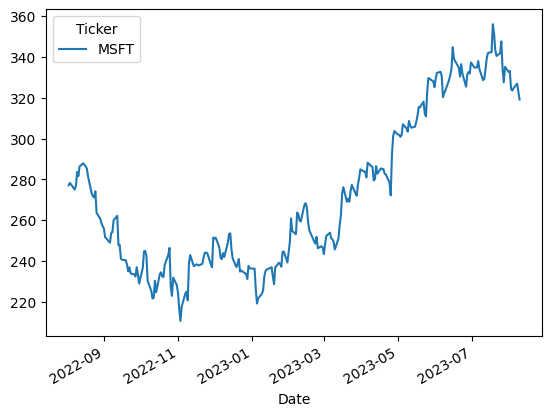

In [8]:
microsoft['Close'].plot()

# News API

In [9]:
import requests

API_KEY = '624a9a3e85594ae99cd62b5379d12538' # FD's key
start = '2024-12-09'
end = '2024-12-09'
topic = 'apple'

# set response to the get request to the newsAPI asking for everything on the subjects of Apple
response = requests.get(f"https://newsapi.org/v2/everything?q={topic}&from={start}&to={end}&sortBy=popularity&apiKey={API_KEY}",timeout=10)

# print each title of the articles
for article in response.json()['articles']:
    print(article['title'])

# for each article in the response, use textblob to get the sentiment of the article
from textblob import TextBlob
articles = response.json()['articles']
for article in response.json()['articles']:
    print(TextBlob(article['title']).sentiment)

print("this is a test update")


[Removed]
Apple Pay’s first competitor on the iPhone has arrived in Norway
China opens an antitrust investigation into Nvidia
The Apple Vision Pro Could Finally Get VR Controllers, Thanks to PlayStation
Apple Image Playground Lets You Generate Your Own Hallmark Christmas Movie Poster
iPhone 16 Pro, Pixel 9 Pro, or Galaxy S24 Ultra: Which Flagship Phone Has the Best Camera?
Visible vs. T-Mobile: Which wireless carrier is the better choice for you?
New HomePod to Reportedly Feature 6-7 Inch OLED Display
Apple Store Coming to Saudi Arabia Both Online and In Person Next Year
Several Apple TV+ Shows Score Golden Globe Nominations
World's First Apple Pay Alternative for iPhone Launches in Norway
Apple Hit With $1.2B Lawsuit Over Abandoned CSAM Detection System
iPhone SE 4 Said to Feature 48MP Rear Lens, 12MP TrueDepth Camera
Get Apple's 10th Gen iPad for $279.00 at Amazon ($70 Off)
MacBook Pros With OLED Displays Won't Have a Notch, Roadmap Shows
Review: Ugreen's Line of 'Uno' Chargers and H

# Pandas read_html() function

Pandas provides a `read_html()` function that allows you to extract tables from HTML web pages and convert them into Pandas DataFrames. This function is particularly useful for web scraping tasks where you need to extract data from HTML tables on a web page. The `read_html()` function can automatically detect and parse HTML tables from a web page and return them as a list of DataFrames. You can then manipulate the DataFrames using Pandas to perform further analysis or export the data to other formats.

In [10]:
# For example, if we want to get a list of the tickers in the Nasdaq 100, 
# we can use the following code:
nasdaq = 'https://en.wikipedia.org/wiki/Nasdaq-100#Components'
data_table = pd.read_html(nasdaq)

# print out information about the data_table
print(f'Type: {type(data_table)}')
print(f'Length: {len(data_table)}')
print(f'Dimensions: {data_table[1].shape}')

data_table[4]

Type: <class 'list'>
Length: 18
Dimensions: (2, 3)


,Company,Symbol,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Advanced Micro Devices,AMD,Information Technology,Semiconductors
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Vertex Pharmaceuticals,VRTX,Health Care,Biotechnology
97,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities
